# Vectorized Diamond-Square algorihm

From Wikipedia https://en.wikipedia.org/wiki/Diamond-square_algorithm:

The diamond-square algorithm begins with a 2D square array of width and height 2n + 1. The four corner points of the array must first be set to initial values. The diamond and square steps are then performed alternately until all array values have been set.

The diamond step: For each square in the array, set the midpoint of that square to be the average of the four corner points plus a random value.

The square step: For each diamond in the array, set the midpoint of that diamond to be the average of the four corner points plus a random value.

At each iteration, the magnitude of the random value should be reduced.

During the square steps, points located on the edges of the array will have only three adjacent values set rather than four. There are a number of ways to handle this complication - the simplest being to take the average of just the three adjacent values. Another option is to 'wrap around', taking the fourth value from the other side of the array. When used with consistent initial corner values this method also allows generated fractals to be stitched together without discontinuities.

![DS_algorithm](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Diamond_Square.svg/1600px-Diamond_Square.svg.png)

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Testing simple 5x5 grid

Just as in the picture above

In [154]:
n = 5
scale_factor = 10.
z = np.zeros((n,n))

In [155]:
# seed corners
random.seed(52062)

In [156]:
z[0,0] = 1 # random.random()*scale_factor
z[-1,0] = 2 # random.random()*scale_factor
z[0,-1] = 3 # random.random()*scale_factor
z[-1,-1] = 4 # random.random()*scale_factor

In [157]:
z[::n,0], z[-1,0::n], z[::n,-1], z[(n-1)::n,-1], 

(array([1.]), array([2.]), array([3.]), array([4.]))

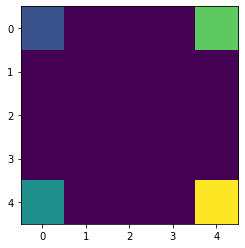

In [158]:
plt.imshow(z)

In [159]:
z[2:-2:3,2:-2:3] = 0.25 * (z[0::n,0] + z[0::n,-1] + z[0,0::n] + z[-1,0::n])

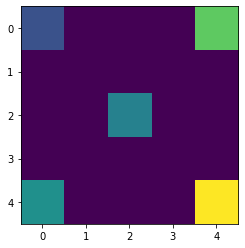

In [160]:
plt.imshow(z)

In [161]:
z[2,2]

1.75

In [162]:
(1+2+3+4)*0.25

2.5

In [163]:
# testing slicing over multiple scales:
((n-1) + n) * (2 * (n-1) +n )

117

## Vectorized DS on non-square grid

Example with 2/1 size ratio, extend later

### Define simple example grid

In [492]:
n = 3
n_factor_r = 1
z = np.arange(((n-1) + n) * (n_factor_r * (n-1) +n ))
z = z.reshape(((n-1)+n,n_factor_r*(n-1)+n))

In [493]:
z

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

### Diamond Step

![DS_algorithm](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Diamond_Square.svg/1600px-Diamond_Square.svg.png)

In [266]:
z

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [298]:
# points to interpolate
z[int((n-1)/2)::(n-1),int((n-1)/2)::(n-1)]

array([[ 6,  8],
       [16, 18]])

In [267]:
# top left
z[:-(n-1):(n-1),:-(n-1):(n-1)]

array([[ 0,  2],
       [10, 12]])

In [268]:
# top right
z[:-(n-1):(n-1),(n-1)::(n-1)]

array([[ 2,  4],
       [12, 14]])

In [269]:
# bottom left
z[(n-1)::(n-1),:-(n-1):(n-1)]

array([[10, 12],
       [20, 22]])

In [270]:
# bottom right
z[(n-1)::(n-1),(n-1)::(n-1)]

array([[12, 14],
       [22, 24]])

## Square step


![DS_algorithm](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Diamond_Square.svg/1600px-Diamond_Square.svg.png)

Note: use bounrday method, i.e.: only use neighbour values at boundary and divide by three. For a vectorized implementation without too many cases, we will first expand the array with zeros and then simply apply the vecorization to both offset diagonals (as it is a basically an interpolation of a checkerboard pattern, see image):

## Hierarchy 2

We start with hierarchy level two, to implement:

#### a) Expand/ pad array with zeros

In [307]:
z_pad = np.pad(z, int((n-1)/2))
z_pad

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  2,  3,  4,  0],
       [ 0,  5,  6,  7,  8,  9,  0],
       [ 0, 10, 11, 12, 13, 14,  0],
       [ 0, 15, 16, 17, 18, 19,  0],
       [ 0, 20, 21, 22, 23, 24,  0],
       [ 0,  0,  0,  0,  0,  0,  0]])

#### b) Checkerboard odd (incl. first and last line, starts at (n-1))

In [328]:
# check-odd, values to interpolate:
z_pad[int((n-1)/2)::(n-1),int((n-1)):-(n-1):(n-1)]

array([[ 1,  3],
       [11, 13],
       [21, 23]])

In [331]:
# check-odd, left
z_pad[int((n-1)/2)::(n-1),int((n-1)/2):-(n-1):(n-1)]

array([[ 0,  2],
       [10, 12],
       [20, 22]])

In [336]:
# check-odd, right
z_pad[int((n-1)/2)::(n-1),int((n-1)+(n-1)/2):-int((n-1)/2):(n-1)]

array([[ 2,  4],
       [12, 14],
       [22, 24]])

In [339]:
# check-odd, top
z_pad[:-int((n-1)/2):(n-1),int((n-1)):-(n-1):(n-1)]

array([[ 0,  0],
       [ 6,  8],
       [16, 18]])

In [342]:
# check-odd, bottom
z_pad[int((n-1))::(n-1),int((n-1)):-(n-1):(n-1)]

array([[ 6,  8],
       [16, 18],
       [ 0,  0]])

#### c) Checkerboard even


![DS_algorithm](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Diamond_Square.svg/1600px-Diamond_Square.svg.png)

In [343]:
z_pad

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  2,  3,  4,  0],
       [ 0,  5,  6,  7,  8,  9,  0],
       [ 0, 10, 11, 12, 13, 14,  0],
       [ 0, 15, 16, 17, 18, 19,  0],
       [ 0, 20, 21, 22, 23, 24,  0],
       [ 0,  0,  0,  0,  0,  0,  0]])

In [347]:
# check-even, values to interpolate:
z_pad[int((n-1)):-(n-1):(n-1),int((n-1)/2):-int((n-1)/2):(n-1)]

array([[ 5,  7,  9],
       [15, 17, 19]])

In [348]:
# check-even, left:
z_pad[int((n-1)):-(n-1):(n-1),:-int((n-1)):(n-1)]

array([[ 0,  6,  8],
       [ 0, 16, 18]])

In [349]:
# check-even, right:
z_pad[int((n-1)):-(n-1):(n-1),int(n-1)::(n-1)]

array([[ 6,  8,  0],
       [16, 18,  0]])

In [352]:
# check-even, top:
z_pad[int((n-1)/2):-int((n-1)):(n-1),int((n-1)/2):-int((n-1)/2):(n-1)]

array([[ 0,  2,  4],
       [10, 12, 14]])

In [355]:
# check-even, bottom:
z_pad[int((n-1)+(n-1)/2):-int((n-1)/2):(n-1),int((n-1)/2):-int((n-1)/2):(n-1)]

array([[10, 12, 14],
       [20, 22, 24]])

## DS-interpolation on multiple hierarchies

We now extend the method to multiple hierarchies (aim: aribtrary hierarchies, for full flexibility).

Note: this is still only the node selection, not the interpolation (and randomization, yet)!

![DS_algorithm](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Diamond_Square.svg/1600px-Diamond_Square.svg.png)

### Diamond step

In [356]:
z

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [362]:
def diamond_step(z, n, m):
    """Perform diamond step on hierarchy m, for spacing of n"""

In [396]:
m = 1

In [397]:
# points to interpolate
z[m*int((n-1)/2)::m*(n-1),m*int((n-1)/2)::m*(n-1)]

array([[ 6,  8],
       [16, 18]])

In [398]:
# top left
z[:m*-(n-1):m*(n-1),:m*-(n-1):m*(n-1)]

array([[ 0,  2],
       [10, 12]])

In [399]:
# top right
z[:m*-(n-1):m*(n-1),m*(n-1)::m*(n-1)]

array([[ 2,  4],
       [12, 14]])

In [400]:
# bottom left
z[m*(n-1)::m*(n-1),:-m*(n-1):m*(n-1)]

array([[10, 12],
       [20, 22]])

In [401]:
# bottom right
z[m*(n-1)::m*(n-1),m*(n-1)::m*(n-1)]

array([[12, 14],
       [22, 24]])

### Square step


![DS_algorithm](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Diamond_Square.svg/1600px-Diamond_Square.svg.png)

In [402]:
z_pad = np.pad(z, m*int((n-1)/2))
z_pad



array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  2,  3,  4,  0],
       [ 0,  5,  6,  7,  8,  9,  0],
       [ 0, 10, 11, 12, 13, 14,  0],
       [ 0, 15, 16, 17, 18, 19,  0],
       [ 0, 20, 21, 22, 23, 24,  0],
       [ 0,  0,  0,  0,  0,  0,  0]])

#### b) Checkerboard odd (incl. first and last line, starts at (n-1))

In [403]:
# check-odd, values to interpolate:
z_pad[m*int((n-1)/2)::m*(n-1),m*int((n-1)):-m*(n-1):m*(n-1)]

array([[ 1,  3],
       [11, 13],
       [21, 23]])

In [404]:
# check-odd, left
z_pad[m*int((n-1)/2)::m*(n-1),m*int((n-1)/2):-m*(n-1):m*(n-1)]

array([[ 0,  2],
       [10, 12],
       [20, 22]])

In [405]:
# check-odd, right
z_pad[m*int((n-1)/2)::m*(n-1),m*int((n-1)+(n-1)/2):-m*int((n-1)/2):m*(n-1)]

array([[ 2,  4],
       [12, 14],
       [22, 24]])

In [406]:
# check-odd, top
z_pad[:-m*int((n-1)/2):m*(n-1),m*int((n-1)):-m*(n-1):m*(n-1)]

array([[ 0,  0],
       [ 6,  8],
       [16, 18]])

In [407]:
# check-odd, bottom
z_pad[m*int((n-1))::m*(n-1),m*int((n-1)):-m*(n-1):m*(n-1)]

array([[ 6,  8],
       [16, 18],
       [ 0,  0]])

#### c) Checkerboard even


![DS_algorithm](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Diamond_Square.svg/1600px-Diamond_Square.svg.png)

In [408]:
z_pad

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  2,  3,  4,  0],
       [ 0,  5,  6,  7,  8,  9,  0],
       [ 0, 10, 11, 12, 13, 14,  0],
       [ 0, 15, 16, 17, 18, 19,  0],
       [ 0, 20, 21, 22, 23, 24,  0],
       [ 0,  0,  0,  0,  0,  0,  0]])

In [409]:
# check-even, values to interpolate:
z_pad[m*int((n-1)):-m*(n-1):m*(n-1),m*int((n-1)/2):-m*int((n-1)/2):m*(n-1)]

array([[ 5,  7,  9],
       [15, 17, 19]])

In [410]:
# check-even, left:
z_pad[m*int((n-1)):-m*(n-1):m*(n-1),:-m*int((n-1)):m*(n-1)]

array([[ 0,  6,  8],
       [ 0, 16, 18]])

In [411]:
# check-even, right:
z_pad[m*int((n-1)):-m*(n-1):m*(n-1),m*int(n-1)::m*(n-1)]

array([[ 6,  8,  0],
       [16, 18,  0]])

In [412]:
# check-even, top:
z_pad[m*int((n-1)/2):-m*int((n-1)):m*(n-1),m*int((n-1)/2):-m*int((n-1)/2):m*(n-1)]

array([[ 0,  2,  4],
       [10, 12, 14]])

In [417]:
# check-even, bottom:
z_pad[m*int((n-1)+(n-1)/2)::m*(n-1),m*int((n-1)/2):-m*int((n-1)/2):m*(n-1)]

array([[10, 12, 14],
       [20, 22, 24]])

## Visualization of point selection on multiple hierarchies

For testing/ debugging: visualization of point selection

In [818]:
def get_selection_diamond(z, n, m_pow):
    """get selected points for diamond step on grid z with original node spacing n on hierarchy m
    """

    m = int(2**m_pow)
    
    # points to interpolate
    z[m*int((n-1)/2)::m*(n-1),m*int((n-1)/2)::m*(n-1)] = 1
    
    # top left
    z[:m*-(n-1):m*(n-1),:m*-(n-1):m*(n-1)] = 2

    # top right
    z[:m*-(n-1):m*(n-1),m*(n-1)::m*(n-1)] = 2

    # bottom left
    z[m*(n-1)::m*(n-1),:-m*(n-1):m*(n-1)] = 2

    # bottom right
    z[m*(n-1)::m*(n-1),m*(n-1)::m*(n-1)] = 2
    
    return z

def plot_selection_diamond(z, n, m_pow, pad=False):
    """Plot selected points for diamond step on grid z with original node spacing n on hierarchy m
    
    pad = bool: show padding in image (for comparison with square step)
    """
    
    m = 2**m_pow
    
    z = get_selection_diamond(z, n, m_pow)
    
    if pad:
        z_pad = np.pad(z, m*int((n-1)/2)).astype('float32')
        plt.imshow(z_pad)
    else:
        plt.imshow(z)

In [1024]:
def get_selection_square(z, n, m_pow):
    """Plot selected points for square step on grid z with original node spacing n on hierarchy m
    """
    
    m = int(2**m_pow)
    
    # pad cells with zero value
    z_pad = np.pad(z, m*int((n-1)/2)).astype('float32')
    
    ## Checkerboard odd

    # check-odd, values to interpolate:
    z_pad[m*int((n-1)/2)::m*(n-1),m*int((n-1)):-m*(n-1):m*(n-1)] = 1

    # check-odd, left
    z_pad[m*int((n-1)/2)::m*(n-1),m*int((n-1)/2):-m*(n-1):m*(n-1)] = 2

    # check-odd, right
    z_pad[m*int((n-1)/2)::m*(n-1),m*int((n-1)+(n-1)/2):-m*int((n-1)/2):m*(n-1)] = 2

    # check-odd, top
    z_pad[:-m*int((n-1)/2):m*(n-1),m*int((n-1)):-m*(n-1):m*(n-1)] = 2

    # check-odd, bottom
    z_pad[m*int((n-1))::m*(n-1),m*int((n-1)):-m*(n-1):m*(n-1)] = 2

    ## Checkerboard even

    # check-even, values to interpolate:
    z_pad[m*int((n-1)):-m*(n-1):m*(n-1),m*int((n-1)/2):-m*int((n-1)/2):m*(n-1)] = 1

    # check-even, left:
    z_pad[m*int((n-1)):-m*(n-1):m*(n-1),:-m*int((n-1)):m*(n-1)] = 2

    # check-even, right:
    z_pad[m*int((n-1)):-m*(n-1):m*(n-1),m*int(n-1)::m*(n-1)] = 2

    # check-even, top:
    z_pad[m*int((n-1)/2):-m*int((n-1)):m*(n-1),m*int((n-1)/2):-m*int((n-1)/2):m*(n-1)] = 2

    # check-even, bottom:
    z_pad[m*int((n-1)+(n-1)/2)::m*(n-1),m*int((n-1)/2):-m*int((n-1)/2):m*(n-1)] = 2
    
    return z_pad
        
def plot_selection_square(z, n, m_pow, pad=False):
    """Plot selected points for square step on grid z with original node spacing n on hierarchy m
    
    pad = bool: show padding in image or remove (for comparison with diamond step)
    """
    
    m = 2**m_pow
    
    z_pad = get_selection_square(z, n, m_pow)
    print(pad)
    
    if pad:
        plt.imshow(z_pad)
    else:
        plt.imshow(z_pad[m*int((n-1)/2):-m*int((n-1)/2), m*int((n-1)/2):-m*int((n-1)/2)])
        
def plot_diamond_and_square(z, n, m_pow_max, pad=False):
    """Plot selected points for diamond and square step for all hierarchies side by side"""
    
    shape_ratio = z.shape[0]/z.shape[1]
    
    f, axes = plt.subplots(2, m_pow_max, figsize=(12,12*shape_ratio/m_pow_max*2))
    
    for i,m_pow in enumerate(np.arange(m_pow_max)[::-1]):
        m = 2**m_pow
        z_zero = np.zeros_like(z)
        z_diamond = get_selection_diamond(z_zero, n, m_pow)
        z_square = get_selection_square(z_zero, n, m_pow)
        if pad:
            z_pad = np.pad(z_diamond, m*int((n-1)/2)).astype('float32')
            axes[0,i].imshow(z_pad)
            axes[1,i].imshow(z_square)
        else:
            axes[0,i].imshow(z_diamond)
            axes[1,i].imshow(z_square[m*int((n-1)/2):-m*int((n-1)/2), m*int((n-1)/2):-m*int((n-1)/2)])
    

In [1037]:
h_factor = 3
w_factor = 4
z = np.arange((2**h_factor + 1) * (2**w_factor + 1))
z = z.reshape((2**h_factor + 1, 2**w_factor + 1))
z.shape

(9, 17)

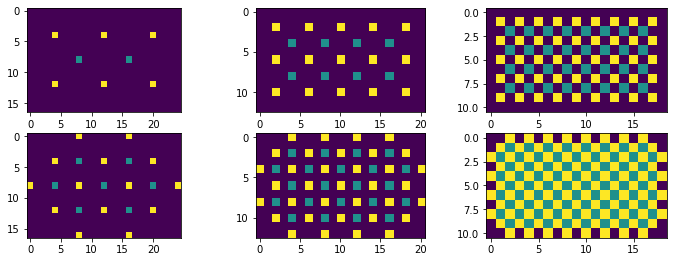

In [1039]:
m_pow_max = min(h_factor, w_factor_r)

pad = True
z_zero = np.zeros_like(z)
plot_diamond_and_square(z_zero, 3, m_pow_max, pad=pad)

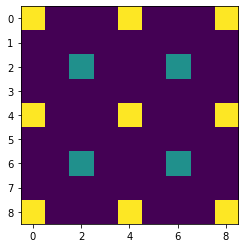

In [944]:
m_pow = 1
pad = False
z_zero = np.zeros_like(z)
plot_selection_diamond(z_zero, n, m_pow, pad=pad)

False


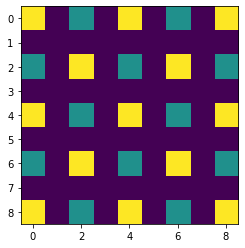

In [945]:
plot_selection_square(z_zero, n, m_pow, pad=pad)

### Scale

Note: using non-wrapped scaling, i.e.: at edges division by 3, else by 4.

For vectorization, we create a "division grid" with corresponding values:


Also to do:

- random initialization with multiple methods (also: RF?)
- automatic adjustment to gempy model range
- visualization: compare randomized initial values vs. more hierarchies on DS step

In [437]:
np.pad?